<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

# Part 2: Data Preprocessing and EDA

<h3 style='text-align: justify;'>  This section consists of the data cleaning portion on the train dataset to check for any null values in the features and impute the values to the features as well as exploratory data analysis (EDA) on the train dataset to filter features that have an influence on the Sale Price.</h3>

### Contents:
* [Organisation of Notebooks](#Organisation-of-Notebooks)
* [Import Libraries and Dataset](#Import-Libraries-and-Dataset)
* [Feature Separation](#Feature-Separation)
* [Imputation](#Imputation)
* [Feature Filtering](#Feature-Filtering)
    * [Filtering continous/discrete features](#Filtering-continous-and-discrete-features)
    * [Filtering ordinal featuress](#Filtering-ordinal-features)
    * [Filtering-nominal-features](#Filtering-nominal-features)
* [Modification of Train Dataset](#Modification-of-Train-Dataset)
* [Summary](#Summary)

## Organistation of Notebooks:
1. [Introduction](./01_Introduction.ipynb)
2. Data Preprocessing and EDA
3. [Model Validation](./03_ModelValidation.ipynb)
4. [Model Testing with Kaggle Dataset](./04_ModelTesting.ipynb)

## Import Libraries and Dataset

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
train = pd.read_csv('./datasets/train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
train.isna().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [6]:
# check which columns with null value, can use len to check how many columns
# any() means any of the rows with null, all() means all of the rows with null
train.columns[train.isnull().any()]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

## Feature Separation

### Features were separated into continous/discrete, ordinal and norminal features respectively

In [7]:
# 35 cont/discrete -> exclude Id/SalePrice become 33
# Year Remod/Add can also represent Year Built -> drop year Built
# Total Bsmt is the sum of BsmtFin SF 1, BsmtFin SF 2, BsmtFin Unf SF -> drop BsmtFin SF 1, BsmtFin SF 2, BsmtFin Unf SF
# Gr Liv Area is the sum of 1st Flr SF, 2nd Flr SF, Low Qual Fin SF -> drop 1st Flr SF, 2nd Flr SF, Low Qual Fin SF
# Garage Area and Garage Cars reprsent the same thing in different perspective -> drop Garage Cars
# drop 8 more -> become 25
cont_disc_vars = ['Lot Frontage', 'Lot Area', 'Year Remod/Add', 'Mas Vnr Area','Total Bsmt SF',\
                  'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', \
                  'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Area', \
                  'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',\
                  'Misc Val', 'Mo Sold', 'Yr Sold']
# all can change to 0
# Lot Frontage -> means no street connected to property
# Mas Vnr Area associated with Mas Vnr Type -> None means 0 Area
# BsmtFin SF 1, BsmtFin SF 2 associated with BsmtFin Type 1 BsmtFin Type 2 being NA/Unf
cont_vars_na = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',\
                'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']

In [8]:
# 23 ordinal -> after filter become 11
ordinal_vars = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',\
                'Exter Cond','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', \
                'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', \
                'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
# 11 varas with null value, change all to NA
ordinal_vars_na = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', \
                   'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence']

In [9]:
# 23 drop PID, so 22 -> after filter become 11
nominal_vars = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood',\
                'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', \
                'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',\
                'Garage Type', 'Misc Feature', 'Sale Type']
# all change to NA except Mas Vnr Type to None, 4 vars with null values
nominal_vars_na = ['Alley', 'Mas Vnr Type', 'Garage Type','Misc Feature']

## Imputation

### Imputing missing values for continous/discrete, nominal and ordinal variables

In [10]:
# all can change to 0
train[cont_vars_na] = train[cont_vars_na].fillna(0)

In [11]:
# all can change to NA
train[ordinal_vars_na] = train[ordinal_vars_na].fillna('NA')

In [12]:
# all change to NA except Mas Vnr Type to None, 4 vars with null values
for var in nominal_vars_na:
    if var == 'Mas Vnr Type':
        train[var] = train[var].fillna('None')
    train[var] = train[var].fillna('NA')

In [13]:
# MS SubClass in the nominal variable need to change from int to object type
train['MS SubClass'] = train['MS SubClass'].map(lambda x: str(x))

In [14]:
# check which columns with null value, can use len to check how many columns
# any() means any of the rows with null, all() means all of the rows with null
train.columns[train.isnull().any()]

Index([], dtype='object')

## Feature Filtering

### Filtering continous and discrete features

In [15]:
# as too many cont_disc variables, braek into 2 part
# to plot on pairplot for easy visualisation
cont_disc_vars1 = ['Lot Frontage', 'Lot Area', 'Year Remod/Add', 'Mas Vnr Area','Total Bsmt SF',\
                  'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr']
cont_disc_vars2 = ['Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Area', \
                  'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',\
                  'Misc Val', 'Mo Sold', 'Yr Sold']

#### Pairplots are used to find the correlation between the continuous/discrete variables and Sale Price

In [16]:
def create_pairplot(df, x_cols, yvalue):
    sns.pairplot(
        data=train,
        x_vars=x_cols,
        y_vars=yvalue
    )

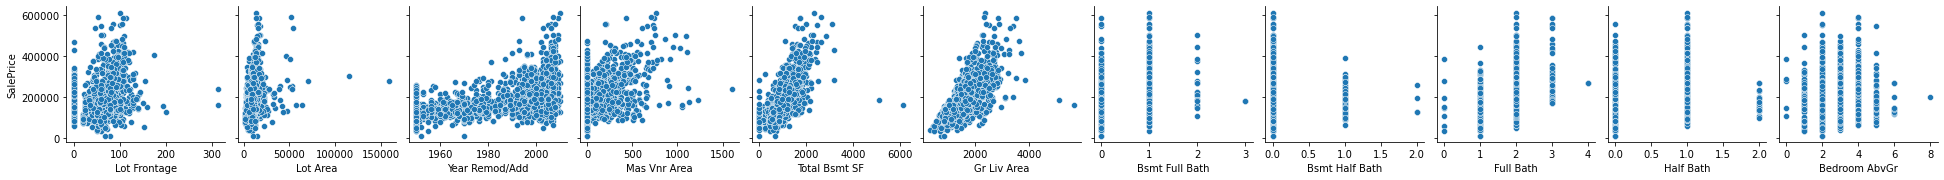

In [17]:
create_pairplot(train, cont_disc_vars1, 'SalePrice')

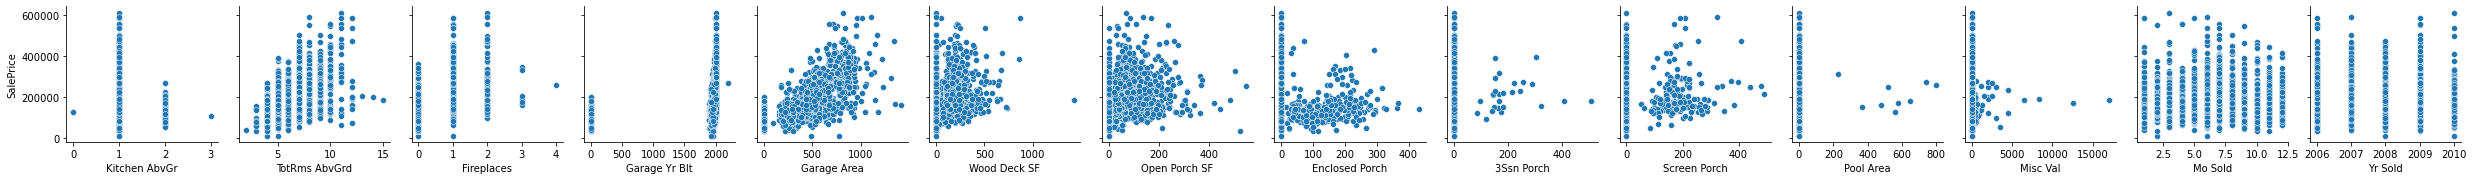

In [18]:
create_pairplot(train, cont_disc_vars2, 'SalePrice')

In [19]:
# from above pairplot 1, Total Bsmt SF, Gr Liv Area correlated
# filtered down to 2
filtered_cont_disc_features = ['Total Bsmt SF', 'Gr Liv Area']

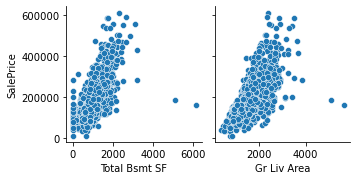

In [20]:
create_pairplot(train, filtered_cont_disc_features, 'SalePrice')

### Observations

From the 2 pairplots above, it can be observed that the total basement area (Total Bsmt SF) and the total area above the ground (Gr Liv Area) are linearly proportional with the Sale Price as can be seen in the first pairplot. Hence, thses 2 variables are retained for the prediction of Sale Price.

### Filtering ordinal features

#### A Function is defined here to filter out the ordinal and nominal variables by checking whether if there is overwhelming occurence of one category. In this case, the threshold chose is 80%.

In [22]:
# function to filter out nominal and ordinal variables with a category of occurence more than 80%
# choice = True filter out nominal and ordinal variables with a category of occurence more than 80%
# choice = False otherwise
def filter_features(list_columns, choice):
    if choice:
        return [col for col in list_columns \
                # train[col].value_counts(normalize=True).value_counts() -> get normalized percentage for each category
                # .index.tolist()[0] -> to get the highest occurence normalized percentage 
                if train[col].value_counts(normalize=True)[train[col].value_counts().index.tolist()[0]] < 0.8]
    return [col for col in list_columns \
            if train[col].value_counts(normalize=True)[train[col].value_counts().index.tolist()[0]] >= 0.8]

In [23]:
# filter ordinal variables using the function above
# eliminate varibles with a category that has an occurance of more than 80%
filtered_ordinal_features = filter_features(ordinal_vars, True)

In [24]:
# 23 ordinal -> after filter become 11
len(filtered_ordinal_features)

11

In [25]:
# here are the ordinal features to be used for predicting the SalePrice
filtered_ordinal_features

['Lot Shape',
 'Overall Qual',
 'Overall Cond',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Finish']

### Observations:

By using the function defined above to filter out the ordinal features with a category that has an occurnece of more than 80%, 11 of the 23 ordinal features are filtered out to be used for the prediction of Sale Price.

#### Barplot function are defined here for visualisation of ordinal and nominal variables. 

In [26]:
def create_barplot(df, x_cols, change_h=False):
    rows = round(len(x_cols)/3)
    fig, ax = plt.subplots(rows, 3, figsize=(25, 30))
    ax = ax.ravel()
    
    for idx, feature in enumerate(x_cols):
        if change_h:
            bp = sns.barplot(
                    # y to specify list of category
                    y=df[feature].value_counts(normalize=True).index.tolist(), 
                    # x to specify the data to the list of category
                    x=df[feature].value_counts(normalize=True)*100,

                    #data=df,
                    ax=ax[idx]        
            )
            bp.axvline(80, color='red')
            bp.set_xlabel('Frequency (%)', fontdict={'fontsize':12, 'fontweight': 'bold'})
            bp.set_ylabel(feature, fontdict={'fontsize':12, 'fontweight': 'bold'})
        else:
            bp = sns.barplot(
                    # x to specify list of category
                    x=df[feature].value_counts(normalize=True).index.tolist(), 
                    # y to specify the data to the list of category
                    y=df[feature].value_counts(normalize=True)*100, 

                    #data=df,
                    ax=ax[idx]        
            )
            bp.axhline(80, color='red')
            bp.set_ylabel('Frequency (%)', fontdict={'fontsize':12, 'fontweight': 'bold'})
            bp.set_xlabel(feature, fontdict={'fontsize':12, 'fontweight': 'bold'})
            
        bp.set_title(f'Bar chart for {feature}', fontdict={'fontsize':16, 'fontweight': 'bold'})
    
    if (len(x_cols) % 3) != 0:
        # remove extra subplot that are not used
        ax.flat[-1].set_visible(False)
    
    plt.show()

#### Barplots are used for visualisation of ordinal features with a category with occurence of more than 80%. A red horizontal line is drawn at the 80% point on the plots.

In [27]:
eliminated_ordinal_features = filter_features(ordinal_vars, False)

#### Barcharts for eliminated ordinal features

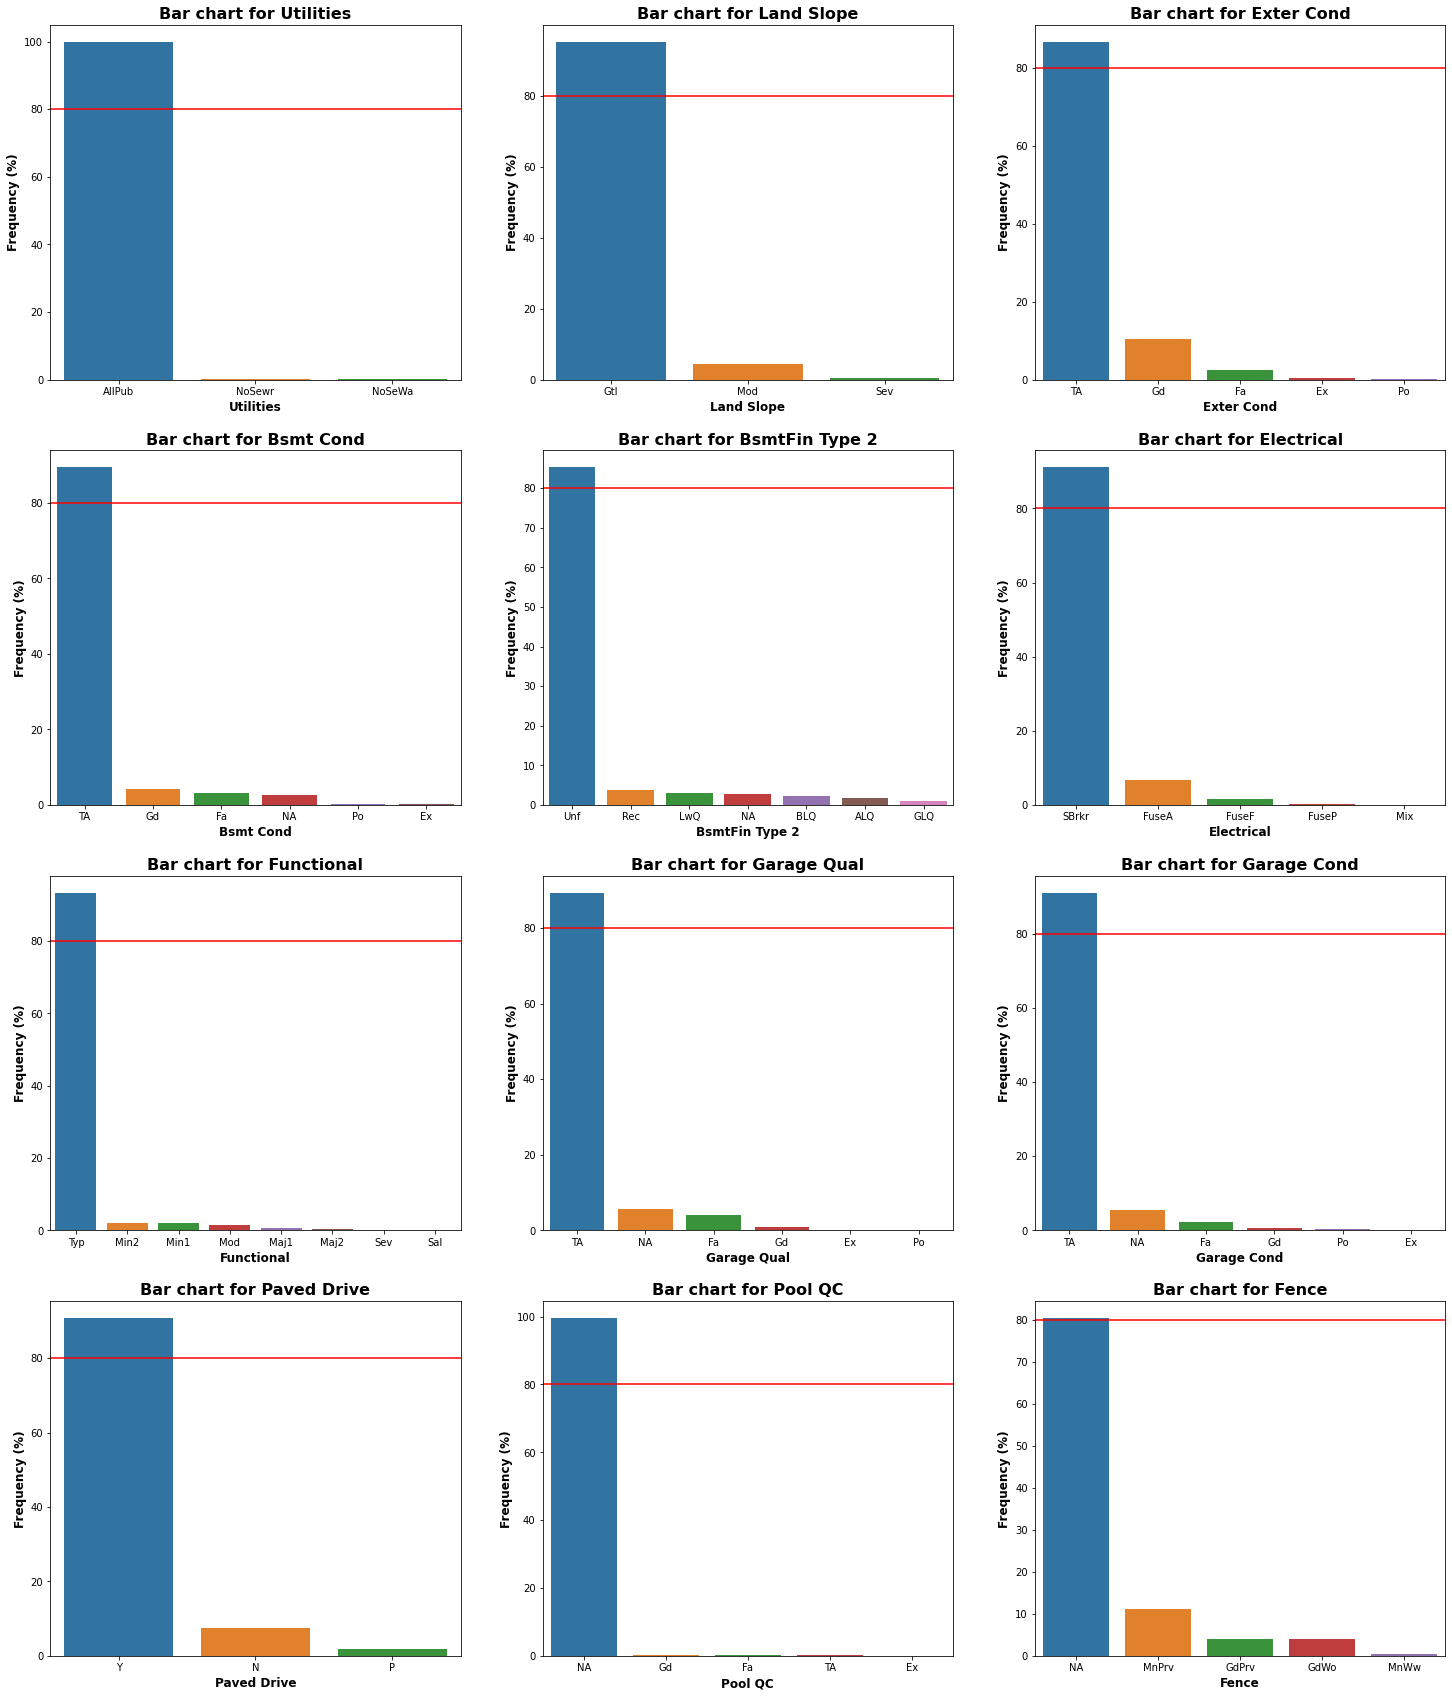

In [28]:
create_barplot(train, eliminated_ordinal_features)

#### Barcharts for filtered ordinal features to be used for the prediction of Sale Price

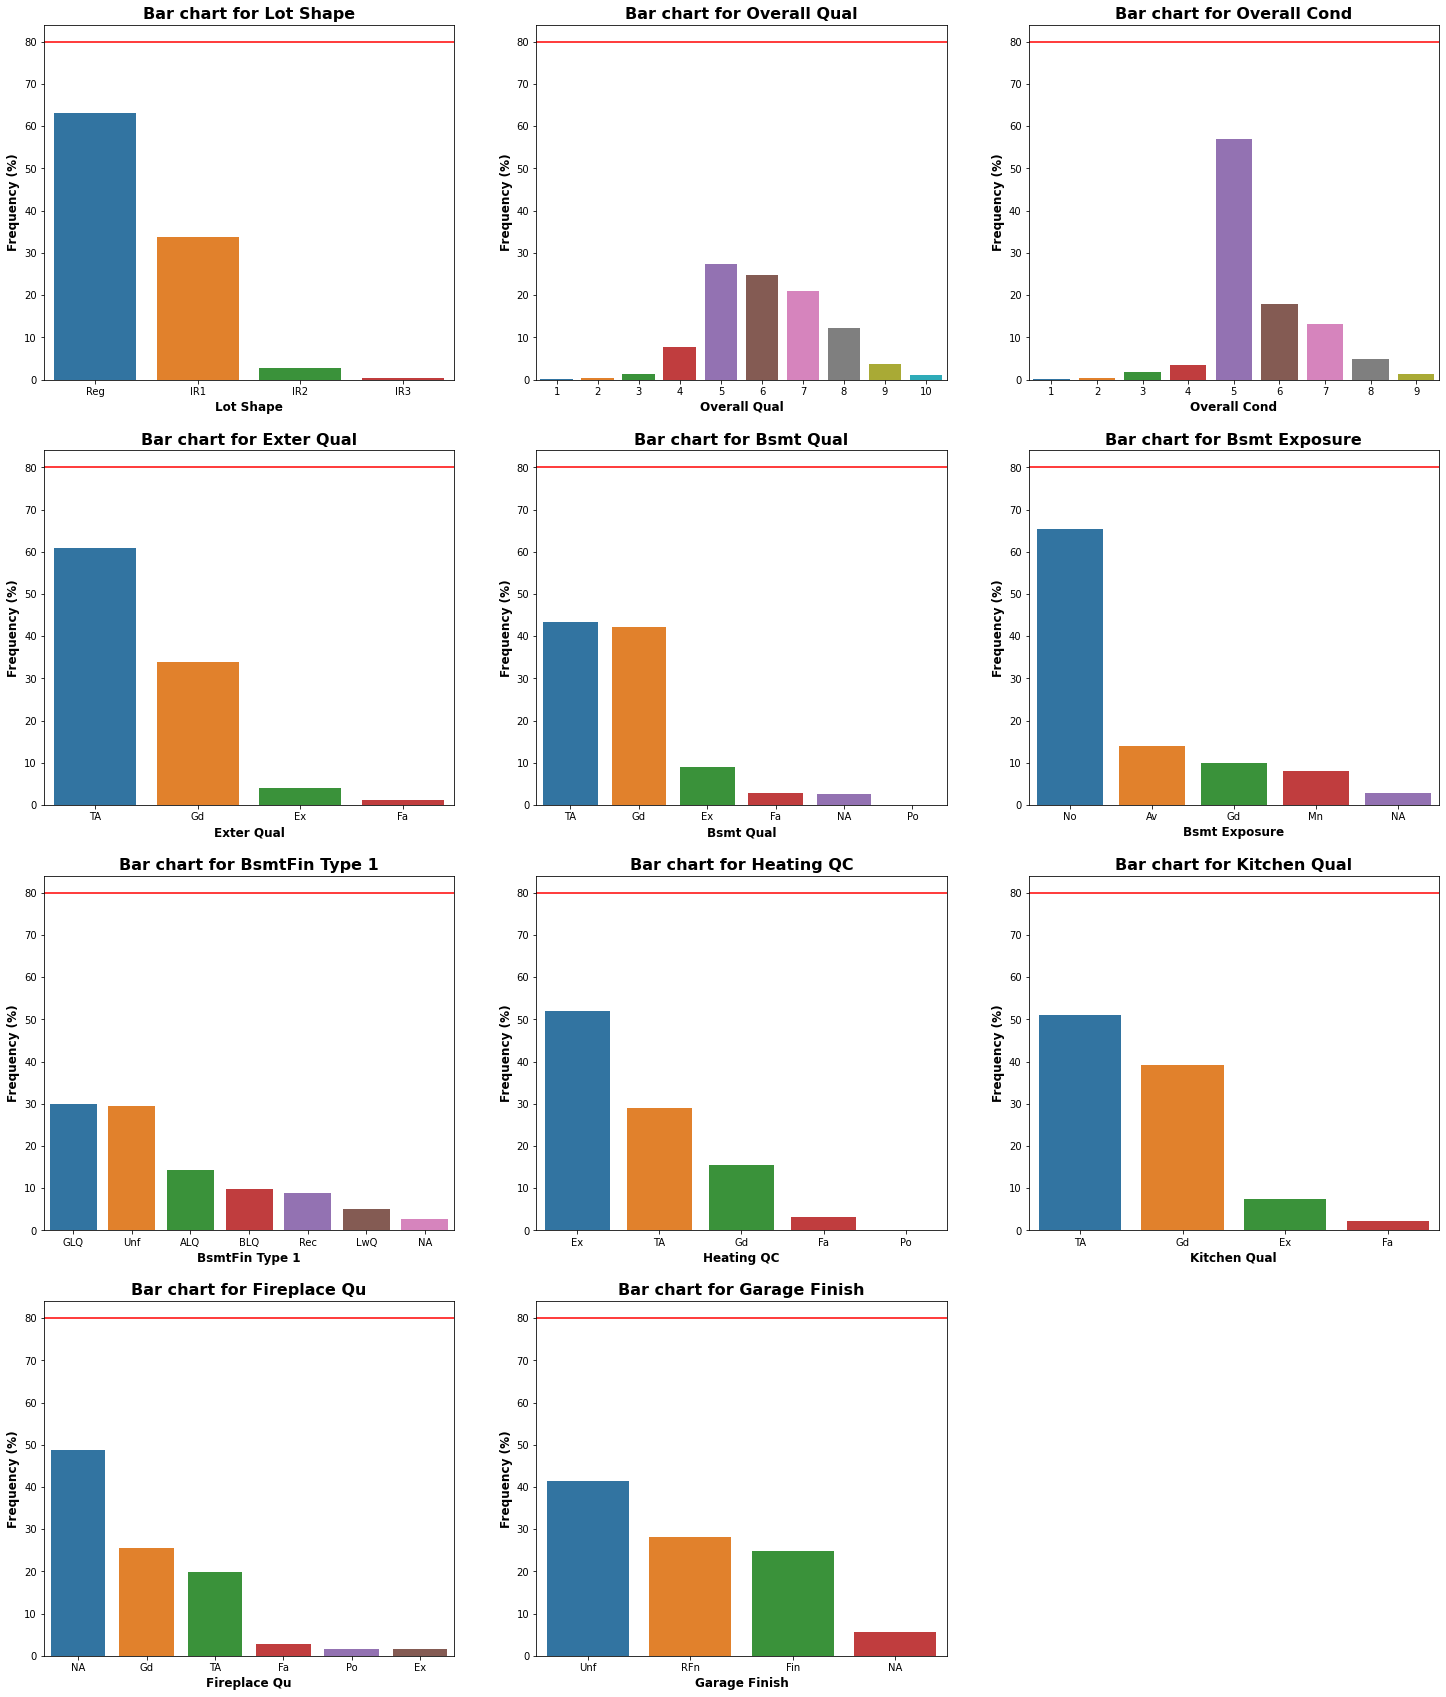

In [29]:
create_barplot(train, filtered_ordinal_features)

### Observations

With the help of the barcharts and a horizontal line with a threshold of 80% occurence,, it can be visualisd easily that the features that are left out have a category with overwhelming occurence. 

#### A function is defined here to convert ordinal features into integers. After the conversion, these variables can be used to plot a pairplot to visualise the correlation.

In [30]:
# Overall Qual, Overall Cond already in int datatype
# so only need to convert for the rest of ordinal variables
# NA is assigned to 0
def convert_ordinal_features(df, features):
    for feature in features:
        if feature == 'Lot Shape':
            df[feature] = df[feature].map({'IR3':1, 'IR2':2, 'IR1':3,'Reg':4})
        elif feature == 'Exter Qual' or feature == 'Heating QC' or feature == 'Kitchen Qual':
            df[feature] = df[feature].map({'Po':1, 'Fa':2, 'TA':3,'Gd':4, 'Ex':5})
        elif feature == 'Bsmt Qual' or feature == 'Fireplace Qu':
            df[feature] = df[feature].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3,'Gd':4, 'Ex':5})
        elif feature == 'Bsmt Exposure':
            df[feature] = df[feature].map({'NA':0, 'No':1, 'Mn':2, 'Av':3,'Gd':4})
        elif feature == 'BsmtFin Type 1':
            df[feature] = df[feature].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6})
        elif feature == 'Garage Finish':
            df[feature] = df[feature].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

In [31]:
convert_ordinal_features(train, filtered_ordinal_features)

In [32]:
# check that the filtered ordinal variables has been converted to integers
train[filtered_ordinal_features].head()

,Lot Shape,Overall Qual,Overall Cond,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,Heating QC,Kitchen Qual,Fireplace Qu,Garage Finish
0,3,6,8,4,3,1,6,5,4,0,2
1,3,7,5,4,4,1,6,5,4,3,2
2,4,5,7,3,3,1,6,3,4,0,1
3,4,5,5,3,4,1,1,4,3,0,3
4,3,6,8,3,2,1,1,3,3,0,1


#### Pairplots can be used to find the correlation between the ordinal features and Sale Price, after the ordinal variables are converted and this can help to further reduce the ordinal features for the prediction of Sale Price.

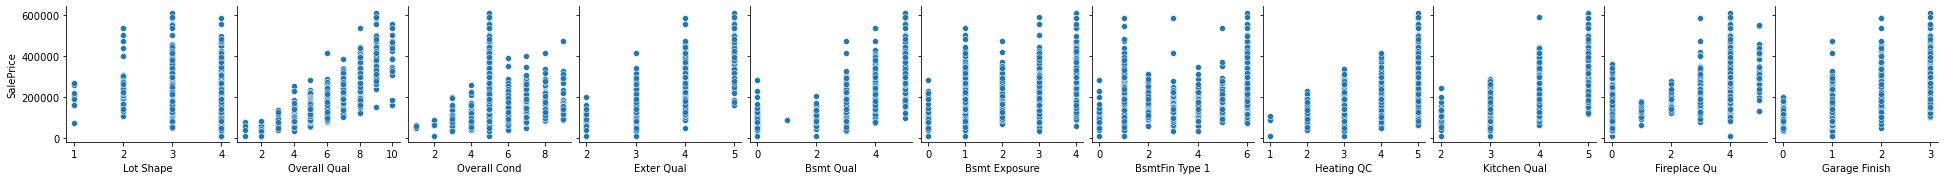

In [33]:
create_pairplot(train, filtered_ordinal_features, 'SalePrice')

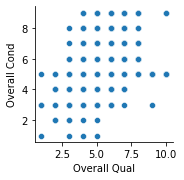

In [34]:
create_pairplot(train, 'Overall Qual', 'Overall Cond')

In [35]:
final_filtered_ordinal_features = ['Overall Qual', 'Exter Qual', 'Heating QC', 'Kitchen Qual', 'Garage Finish']

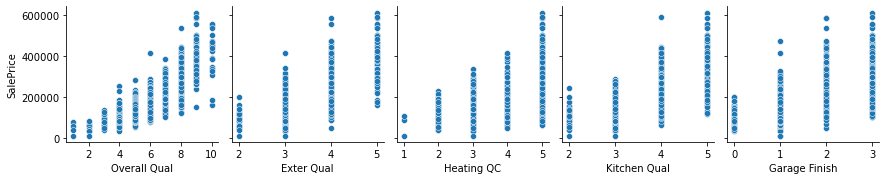

In [36]:
create_pairplot(train, final_filtered_ordinal_features, 'SalePrice')

### Observations:

From the first pairplot above, it can be observed that the overall quality of the house (Overall Qual), the overall condition of the house (Overall Cond), the exterior quality of the house (Exter Qual), the heating quality and condition of the house (Heating QC), the kitchen quality (Kitchen Qual) and whether the interior condition of the garage (Garage Finish) are linearly proportional with the Sale Price. 

In the second pairplot, it can also be visualised that the pairplot between Overall Qual and Overall Cond has a linearly relationship with each other. Hence, one of these variables is retained for the prediction of Sale Price. In this case, Overall Qual is chosen for the prediction of Sale Price.

Eventually, the ordinal features have been reduce to only 5 features which consist of Overall Qual, Exter Qual, Heating QC, Kitchen Qual and Garage Finish.

### Filtering nominal features

In [37]:
# using the same function definde previously to filer ordinal features
filtered_nominal_features = filter_features(nominal_vars, True)

In [38]:
# 22 -> after filter become 11
len(filtered_nominal_features)

11

In [39]:
filtered_nominal_features

['MS SubClass',
 'MS Zoning',
 'Lot Config',
 'Neighborhood',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Garage Type']

### Observations:

By using the function defined previously to filter out the nominal features with a category that has an occurnece of more than 80%, 11 of the 22 nominal features are filtered out to be used for the prediction of Sale Price.

#### Likewise for nominal features, barchats are used to visualised the features that have a category that has overwhelming occurence.

In [40]:
eliminated_nominal_features = filter_features(nominal_vars, False)

#### Barcharts for eliminated nominal features

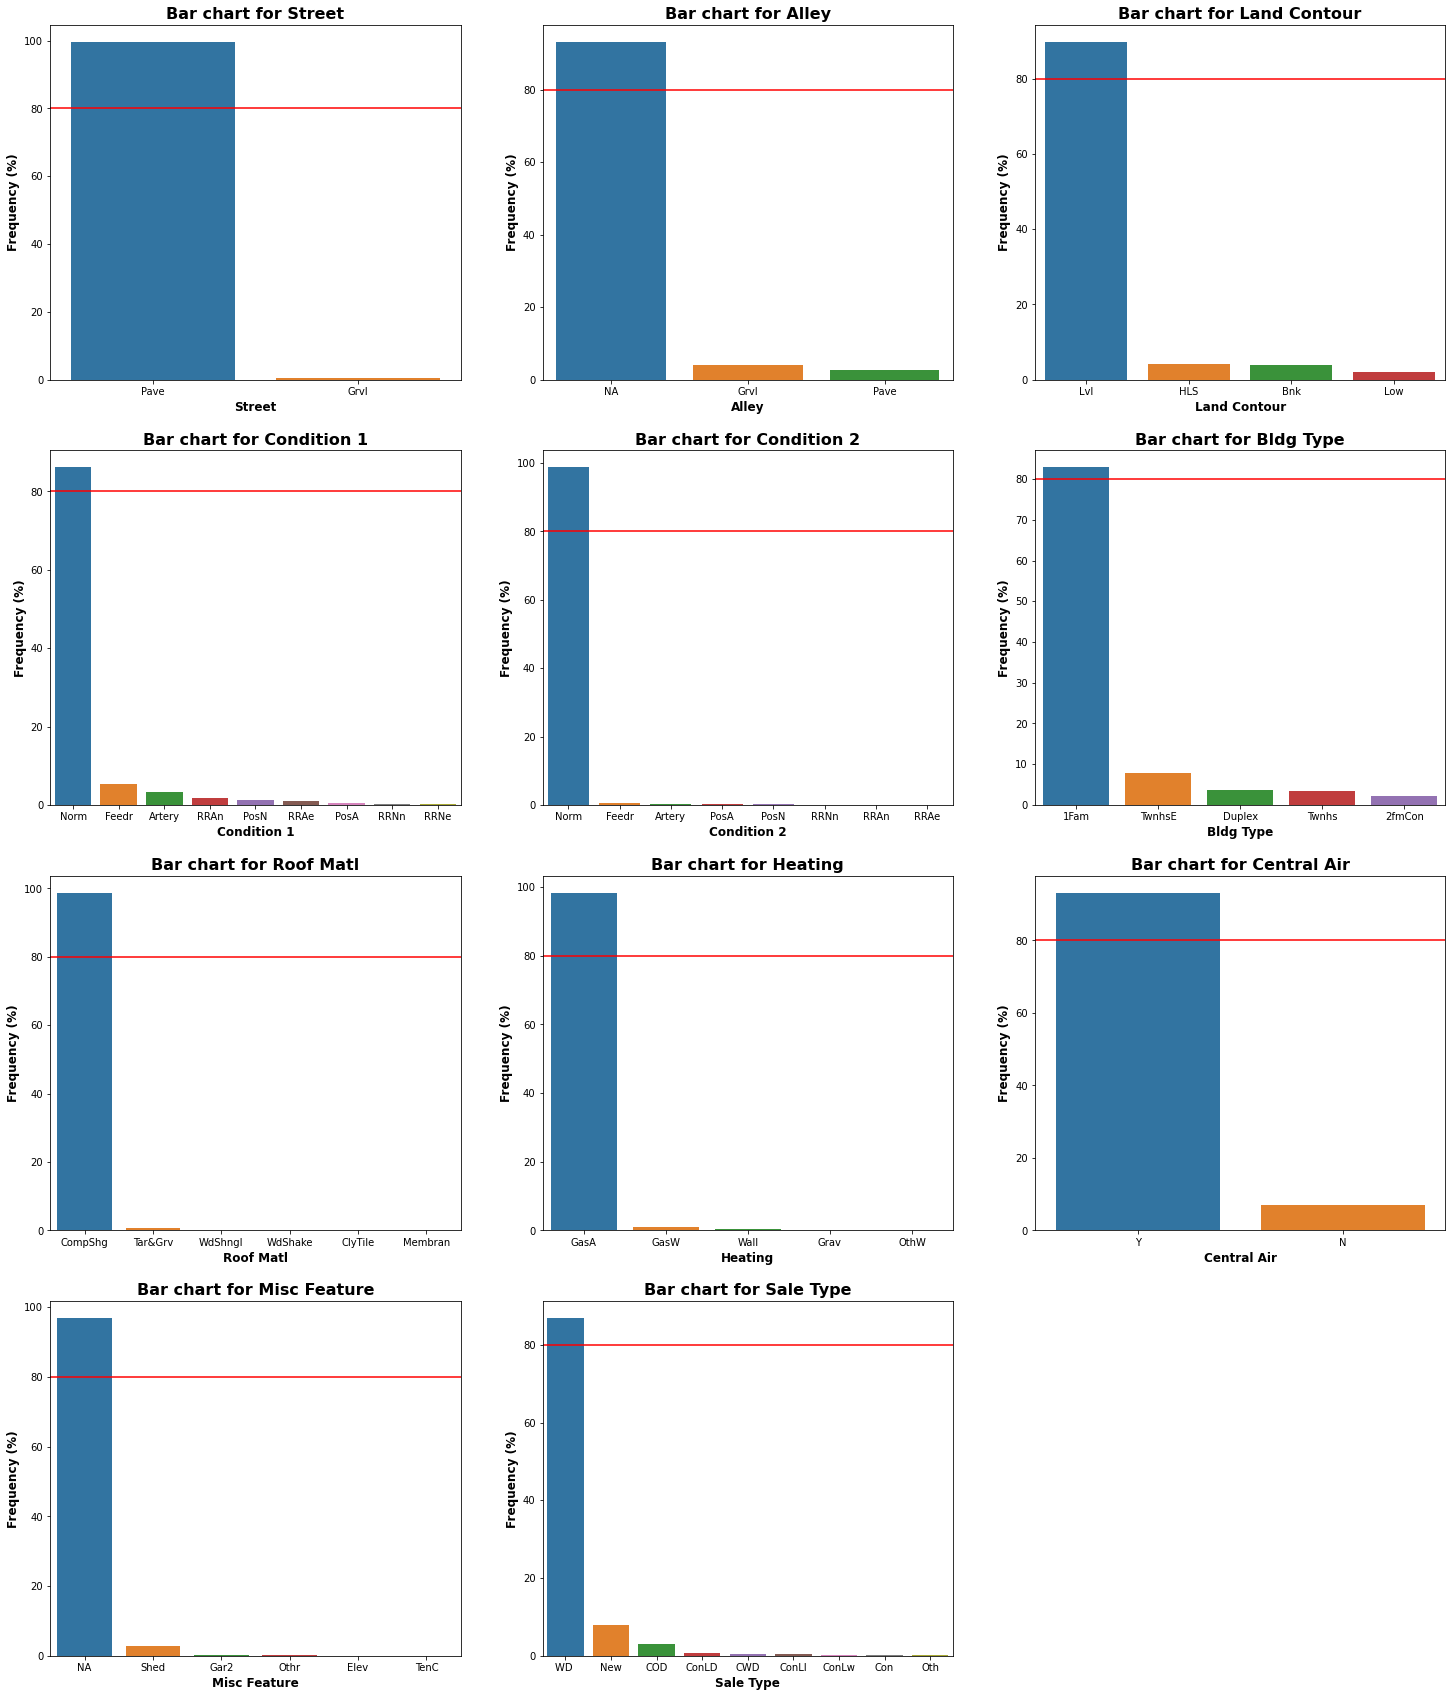

In [41]:
create_barplot(train, eliminated_nominal_features)

#### Barcharts for filtered ordinal features to be used for prediction of Sale Price

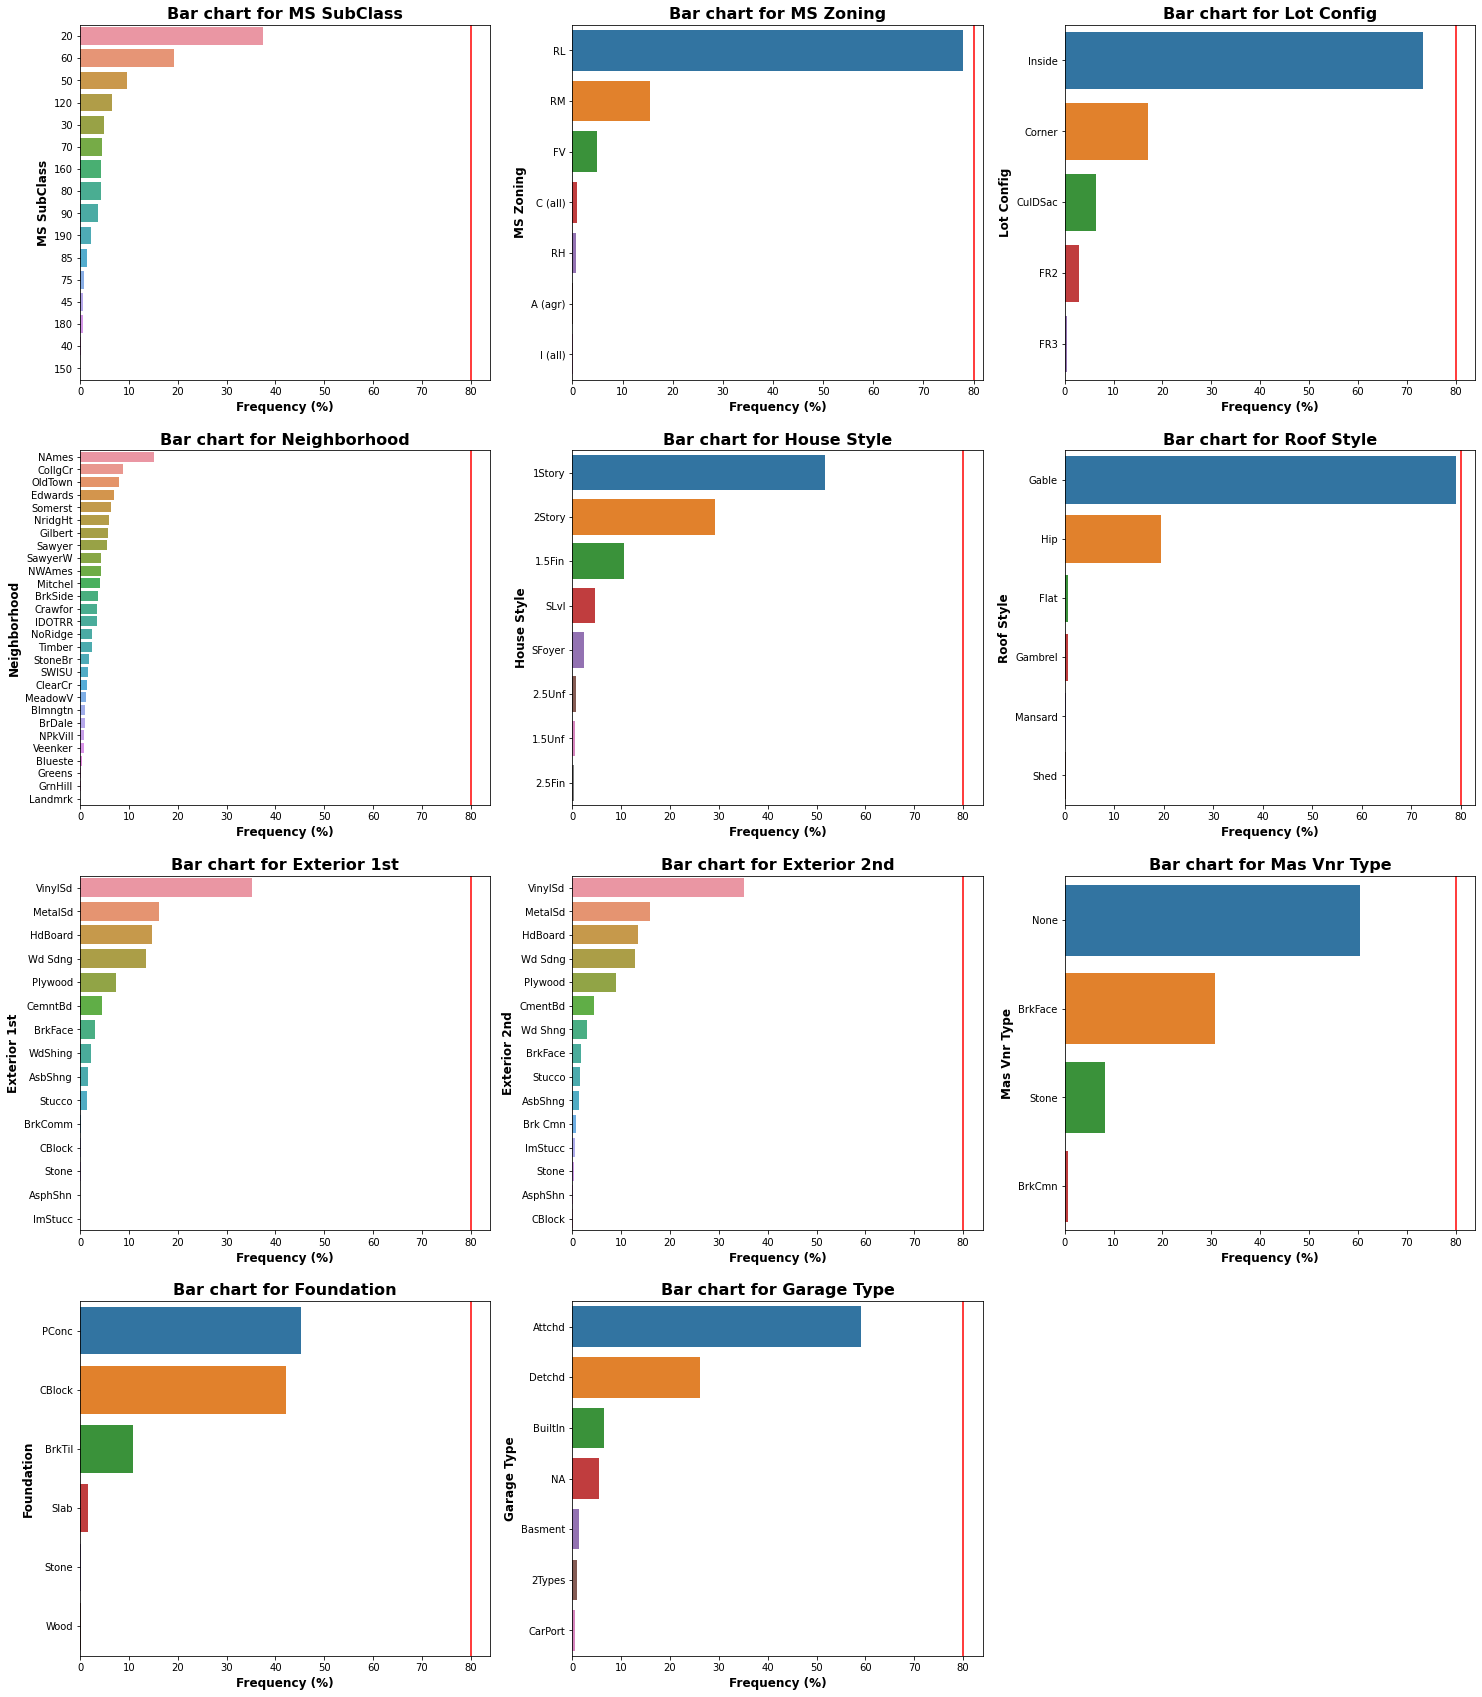

In [42]:
create_barplot(train, filtered_nominal_features, True)

### Observations

Likewise for the nominal features, with the help of the barcharts, it can be visualisd easily with the threshold line of 80% that the features that do not have an overwhelming occurence are retained for the prediction of Sale Price. After filtering the noinmal features, 11 nominal features consist of MS SubClass, MS Zoning, Lot Config, Neighborhood, House Style, Roof Style, Exterior 1st, Exterior 2nd, Mas Vnr Type, Foundation, Garage Type.

For the barcharts that showed the filtered nominal features, it can be observed that there are some of the features that have alot of sub-categories. Hence, in the following steps below, nominal features with more than 15 sub-categories are grouped into 3 sub-classes according to the median Sale Price.

### Further filter nominal features with more than 15 categories into 3 sub-classes depending on the Sale Price

In [43]:
def features_length_more_15(df, list_features):
    return [feature for feature in list_features if len(df[feature].unique()) > 15]

In [44]:
def convert_feature_value(df, features, target):#, value, category):

    for feature in features:
        # get median SalePrice in desc order
        median_desc = df.groupby(feature)[target].median().sort_values(ascending=False)

        sub_class = ['high', 'mid', 'low']
        rate_increase = (median_desc[0] - median_desc[-1]) / 3
    
        high = [median_desc.index[idx] for idx, sale_price in enumerate(median_desc) \
               if sale_price > (median_desc[0] - rate_increase)]
        mid = [median_desc.index[idx] for idx, sale_price in enumerate(median_desc) \
              if sale_price <= (median_desc[0] - rate_increase) \
              and sale_price > (median_desc[-1] + rate_increase)]
        low = [median_desc.index[idx] for idx, sale_price in enumerate(median_desc) \
              if sale_price <= (median_desc[-1] + rate_increase)]
        
        if feature == 'Neighborhood':
            neigh = [high, mid, low]
        elif feature == 'MS SubClass':
            ms_subclass = [high, mid, low]
            
        for category, value in zip(sub_class, [high, mid, low]):
            df[feature] = df[feature].map(lambda x: category if x in value else x)

    return neigh, ms_subclass

In [45]:
nominal_features_subclass = features_length_more_15(train, filtered_nominal_features)

In [46]:
nominal_features_subclass

['MS SubClass', 'Neighborhood']

In [47]:
# convert the nominal features with more than 15 categories into 3 subclasses [high, mid, low]
# and return the list for each of the features in the order of high, mid, low 
neigh, ms_subclass = convert_feature_value(train, nominal_features_subclass, 'SalePrice')

In [48]:
neigh

[['StoneBr', 'NridgHt', 'NoRidge', 'GrnHill', 'Veenker'],
 ['ClearCr',
  'Somerst',
  'Timber',
  'CollgCr',
  'Crawfor',
  'Blmngtn',
  'Greens',
  'NWAmes',
  'SawyerW',
  'Gilbert'],
 ['Mitchel',
  'NPkVill',
  'NAmes',
  'Blueste',
  'Landmrk',
  'SWISU',
  'Sawyer',
  'BrkSide',
  'Edwards',
  'OldTown',
  'BrDale',
  'IDOTRR',
  'MeadowV']]

In [50]:
ms_subclass

[['60', '120'],
 ['80', '75', '20', '85', '150', '70', '160'],
 ['90', '50', '190', '40', '45', '180', '30']]

#### Boxplot function are defined here for visualisation of nominal variables that are feature-engineered into 3 subclasses

In [52]:
def create_boxplot(df, list_columns, target):#, xvalue):
    rows = round(len(list_columns)/2)
    fig, ax = plt.subplots(rows, 2, figsize=(25, 25))
    ax = ax.ravel()
    for idx, feature in enumerate(list_columns):
        # get the index(key) to access the median; sorted by median score in desc order
        my_order = df.groupby(feature)[target].median().sort_values(ascending=False).index
    #             print(feature)
        
        bp = sns.boxplot(
            data=df,
            x=target,
            y=feature,
#             hue=feature,
            ax=ax[idx],
            order=my_order
        )
        bp.set_xlabel(target, fontdict={'fontsize': 16, 'fontweight': 'bold'})
        bp.set_ylabel(feature, fontdict={'fontsize': 16, 'fontweight': 'bold'})
        bp.set_title(f'{target} vs {feature}', fontdict={'fontsize': 16, 'fontweight': 'bold'})

    if len(list_columns) % 2 != 0:
        ax.flat[-1].set_visible(False)

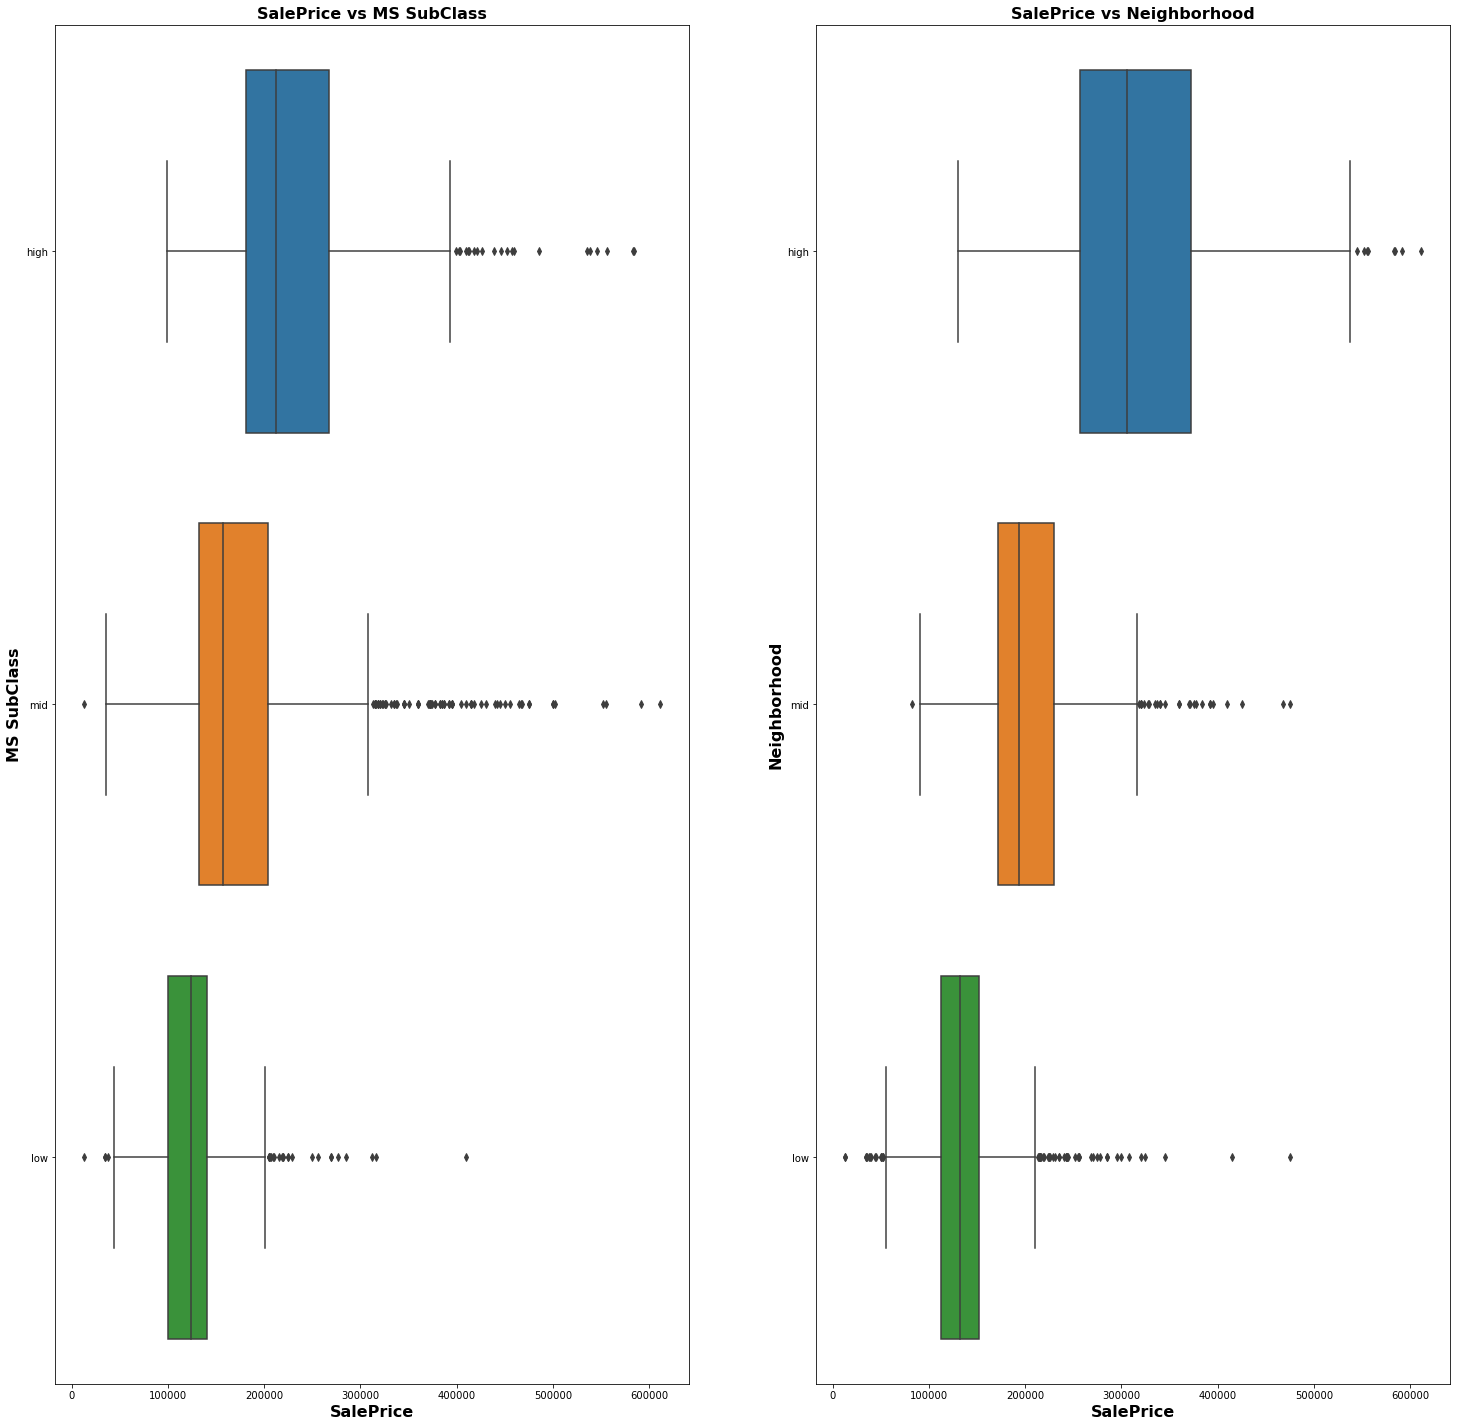

In [53]:
create_boxplot(train, nominal_features_subclass, 'SalePrice')

### Observations:

After converting the Neighborhood and MS Zoning into the 3 sub-classes according to the median Sale Price. It can be observed that the 3 sub-classes median Sale Price for the 2 nominal features do not overlap the interquantile range of the other sub-classes, hence it will be useful to reduce the categories of Neighborhood and MS Zoning features into 3 sub-classes for the prediction of Sale Price.

## Modification of Train Dataset 

The data dictionary for the Ames Housing Dataset to be used for the next 2 sections.

| Feature | Feature Type | Data Type | Dataset | Description |
| --- | --- | --- | --- | --- |
| Total Bsmt BF | Continous | Float | Train/Test | Total Basement Area in Square Feet |
| Gr Liv Area | Continuous | Integer | Train/Test | Total Living Area above Ground in Square Feet |
| Overall Qual | Ordinal | Integer | Train/Test | Rating of Overall Material and Finish of the House |
| Exter Qual | Ordinal | Integer | Train/Test | Quality of Exterior Material |
| Heating QC | Ordinal | Integer | Train/Test | Quality and Condition of Heating |
| Kitchen Qual | Ordinal | Integer | Train/Test | Kitchen Quality |
| Garage Finish | Ordinal | Integer | Train/Test | Interior Finiah of Garage |
| MS SubClass | Nominal | Object | Train/Test | Type of Dwelling Sold|
| MS Zoning | Nominal | Object | Train/Test | General Zoning Classification |
| Lot Config | Nominal | Object | Train/Test | Lot Configuration |
| Neighborhood | Nominal | Object | Train/Test | Physical Locations within Ames City |
| House Style | Nominal | Object | Train/Test | Style of Dwelling |
| Roof Style | Nominal | Object | Train/Test | Roof Type |
| Exterior 1st | Nominal | Object | Train/Test | Exterior covering the the House |
| Exterior 2nd | Nominal | Object | Train/Test | Exterior covering the House if more than 1 Material |
| Mas Vnr Type | Nominal | Object | Train/Test | Masonary Veneer Type |
| Foundation | Nominal | Object | Train/Test | Foundation Type |
| Garage Type | Nominal | Object | Train/Test | Garage Location |
| SalePrice | Continuous | Integer | Train | Sale Price ($$) |

### Merge all the filtered continuous, ordinal and nominal features together to subset the train csv to be used for Model Validation and Model Testing

In [54]:
filtered_variables = [filtered_cont_disc_features, 
                      final_filtered_ordinal_features, 
                      filtered_nominal_features, 
                      ['SalePrice']
                     ]

In [55]:
filtered_variables = list(np.concatenate(filtered_variables).flat)

In [56]:
filtered_variables

['Total Bsmt SF',
 'Gr Liv Area',
 'Overall Qual',
 'Exter Qual',
 'Heating QC',
 'Kitchen Qual',
 'Garage Finish',
 'MS SubClass',
 'MS Zoning',
 'Lot Config',
 'Neighborhood',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Garage Type',
 'SalePrice']

In [57]:
train_filtered = train[filtered_variables]

In [58]:
train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total Bsmt SF  2051 non-null   float64
 1   Gr Liv Area    2051 non-null   int64  
 2   Overall Qual   2051 non-null   int64  
 3   Exter Qual     2051 non-null   int64  
 4   Heating QC     2051 non-null   int64  
 5   Kitchen Qual   2051 non-null   int64  
 6   Garage Finish  2051 non-null   int64  
 7   MS SubClass    2051 non-null   object 
 8   MS Zoning      2051 non-null   object 
 9   Lot Config     2051 non-null   object 
 10  Neighborhood   2051 non-null   object 
 11  House Style    2051 non-null   object 
 12  Roof Style     2051 non-null   object 
 13  Exterior 1st   2051 non-null   object 
 14  Exterior 2nd   2051 non-null   object 
 15  Mas Vnr Type   2051 non-null   object 
 16  Foundation     2051 non-null   object 
 17  Garage Type    2051 non-null   object 
 18  SalePric

In [59]:
train_filtered.head()

,Total Bsmt SF,Gr Liv Area,Overall Qual,Exter Qual,Heating QC,Kitchen Qual,Garage Finish,MS SubClass,MS Zoning,Lot Config,Neighborhood,House Style,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Garage Type,SalePrice
0,725.0,1479,6,4,5,4,2,high,RL,CulDSac,low,2Story,Gable,HdBoard,Plywood,BrkFace,CBlock,Attchd,130500
1,913.0,2122,7,4,5,4,2,high,RL,CulDSac,mid,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,220000
2,1057.0,1057,5,3,3,4,1,mid,RL,Inside,low,1Story,Gable,VinylSd,VinylSd,None,CBlock,Detchd,109000
3,384.0,1444,5,3,4,3,3,high,RL,Inside,mid,2Story,Gable,VinylSd,VinylSd,None,PConc,BuiltIn,174000
4,676.0,1445,6,3,3,3,1,low,RL,Inside,mid,1.5Fin,Gable,Wd Sdng,Plywood,None,PConc,Detchd,138500


In [60]:
# replace whitespace with _
train_filtered = train_filtered.rename(columns=lambda x: x.replace(' ','_'))

In [61]:
# set index=False to drop the index
train_filtered.to_csv('./datasets/train_filtered.csv', index=False)

## Summary

In this section, data cleaning is done on the train dataset to make sure that the missing value for the features are being imputed and the data type for the various features are correct as well as eliminating features that are collinear with other features or do not have any high influence on the target feature, which is the SalePrice. 

Features are first separated into their feature type based on the data description given by Kaggle which include the continuous/discretee, ordinal and nominal features. From the data description provided, some features can be eliminated due to the correlation with the other features. For example in the case of the continuous/discrete features
where the total basement area (Total Bsmt) can be used in place of basement finished (BsmtFin SF 1, BsmtFin SF 2) and unfinished area (BsmtFin Unf SF) as the total basement area is the sum of the 3 components. Hence, by the data description itself, the continuous/discretes features can be reduced from 35 to 25.

By using the EDA, the continous/discreate, ordinal and nominal features can be further reduced. For the continuous/discrete features, pairplots are plotted for the continuous/discretes features against the SalePrice find the corerlation. With the help of pairplots, the total basement area (Total Bsmt) and total ground living area (Gr Liv Area) are 2 features that are highly correlated with the SalePrice, hence are retained to be used for the prediction of Sale Price.

For categorical features such as the nominal and ordinal features, if one of the categories has an overwhelming of more than 80% of the occurence, these features might not be useful in prediction of SalePrice, hence there features will be filtered out for the prediction of SalePrice. Ordinal features, unlike nominal features, have a specific order beyond labeling the category, hence the order of the label can labelled using integers. After re-labeled the ordinal features into integers, pairplot can be used to check for any strong correlation with 'SalePrice'.

After imputation, features are explored using the EDA to look out for any features that have high influence on the SalePrice. For the continuousand have been further reduced to 18 selected features that would have high influence on the target feature which is the 'SalePrince, instead of the original 80 features. These 18 features are Total Bsmt SF, Gr Liv Area, Overall Qual, Exter Qual, Heating QC, Kitchen Qual, Garage Finish, MS SubClass, MS Zoning, Lot Config, Neighborhood, House Style, Roof Style, Exterior 1st, Exterior 2nd , Mas Vnr Type, Foundation and Garage Type. 

Finally, these 18 features are exported with the 'SalePrice' feature to a new csv file named 'train_filered.csv' to be used in Section 3 and 4 for Model Validation and Model Testing.